# Project - $k$-Nearest-Neighbors Classifier
- Create a $k$-Nearest-Neighbors Classifier supporting 3 dimensions
- Investigate whether it performs better

### Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Step 2: Read data
- Use pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/weather.csv**
- HINT: Use **parse_dates=True** and **index_col=0**

In [6]:
data = pd.read_csv('./files/weather.csv', parse_dates = True, index_col=0)

data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


### Step 3: Investigate data types
- Use [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
- The goal is to identify all columns with datatype **float64** for next step

In [7]:
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

### Step 4: Choose 3 columns to create datasets
- Use **Humidity3pm** and **Pressure3pm** together with another column to predict **RainTomorrow**
- Make a list of three column names **'Humidity3pm', 'Pressure3pm', INSERT YOUR CHOICE** (should be one with dtype *float64*, e.g., **Cloud3pm**), and **'RainTomorrow'**
- Create the dataset consisting of these 4 columns

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 

columns = ['Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'RainTomorrow']
dataset = data[columns];

dataset.head()

,Humidity3pm,Pressure3pm,Cloud3pm,RainTomorrow
Date,,,,
2008-02-01,84.0,1017.4,8.0,Yes
2008-02-02,73.0,1016.4,7.0,Yes
2008-02-03,86.0,1015.6,8.0,Yes
2008-02-04,90.0,1011.8,8.0,Yes
2008-02-05,74.0,1004.8,8.0,Yes


### Step 5: Deal with remaining missing data
- A simple choice is to simply remove rows with missing data
- Use [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [16]:
dataset_clean = dataset.dropna()

In [17]:
len(dataset), len(dataset_clean)

(3337, 2754)

### Step 6: Create training and test datasets
- Define dataset **X** to be the data consisting of the three columns.
- Define dataset **y** to be datset cosisting of **'RainTomorrow'**.
    - HINT: Use list comprehension to transform **'No'** and **'Yes'** to 0 and 1, repectively (like in the Lesson)
- Divide into **X_train, X_test, y_train, y_test** with **train_test_split**
    - HINT: See how it is done in Lesson
    - You can use **random_state=42** (or any other number) if you want to reproduce results.

In [18]:
X = dataset_clean[columns[:3]]
y = dataset_clean[columns[3]]
y = np.array([0 if value == 'No' else 1 for value in y])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Step 7: Train and test the model
- Create classifier with **KNeighborsClassifier**
    - You can play around with n_neighbors (default =5)
- Fit the model with training data **(X_train, y_train**)
- Predict data from **X_test** (use predict) and assign to **y_pred**.
- Evalute score by using **metrics.accuracy_score(y_test, y_pred)**.

In [20]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.8127721335268505

### Step 8 (Optional): Try with different columns
- You can redo with diffrent choise of columns (starting from step 4)

## Completed Code Test

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Reading the data
filepath = './files/weather.csv'
data = pd.read_csv(filepath, parse_dates=True, index_col=0)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [3]:
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [4]:
# Only take columns contain float number data
columns = list(data.select_dtypes(include=[np.float64]))
columns.append('RainTomorrow')
print(columns)
dataset = data[columns]
dataset

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'RainTomorrow']


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.6,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,8.6,19.6,0.0,2.0,7.8,37.0,22.0,20.0,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0.0,No
2017-06-22,9.3,19.2,0.0,2.0,9.2,30.0,20.0,7.0,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0.0,No
2017-06-23,9.4,17.7,0.0,2.4,2.7,24.0,15.0,13.0,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0.0,No


In [5]:
dataset_clean = dataset.dropna()
len(dataset), len(dataset_clean)

(3337, 1696)

In [6]:
X = dataset_clean[columns[:-1]]
y = dataset_clean[columns[-1]]
print(y)
y = np.array([0 if value == 'No' else 1 for value in y])

Date
2010-10-20     No
2010-10-21     No
2010-10-22     No
2010-10-26     No
2010-10-27    Yes
             ... 
2017-06-21     No
2017-06-22     No
2017-06-23     No
2017-06-24     No
2017-06-25     No
Name: RainTomorrow, Length: 1696, dtype: object


In [7]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print('Accuracy: %.2f' % (acc * 100.0) + " %")

Accuracy: 85.85 %


#### Plot figure of score accuracy

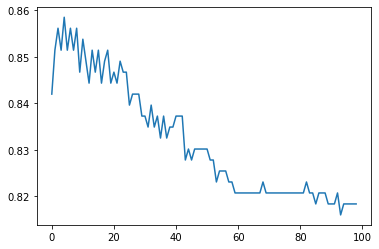

In [10]:
scores = []

for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)
    accuracy_score(y_test, y_pred)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)


fig, ax = plt.subplots()
ax.plot(scores)